<a href="https://colab.research.google.com/github/TaeGongKim/tensorflow-developer/blob/main/Natural%20Language%20Processing%20in%20TensorFlow/Using_LSTMs%2C_see_if_you_can_write_Shakespeare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

import tensorflow.keras.utils as ku
import numpy as np

In [2]:
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 35.9MB/s]


In [3]:
tokenizer = Tokenizer()

data = open('./sonnets.txt').read()

corpus = data.lower().split('\n')

In [5]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i + 1]
    input_sequences.append(n_gram_sequence)

In [6]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))

predictors, label = input_sequences[:,:-1], input_sequences[:, -1]

label = ku.to_categorical(label, num_classes = total_words)

In [10]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length = max_sequence_len - 1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words / 2, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(total_words, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [12]:
history = model.fit(predictors, label, epochs = 100, verbose = 1)

Epoch 1/100
484/484 [==============================] - 21s 24ms/step - loss: 6.9109 - accuracy: 0.0227
Epoch 2/100
484/484 [==============================] - 12s 24ms/step - loss: 6.5034 - accuracy: 0.0211
Epoch 3/100
484/484 [==============================] - 12s 24ms/step - loss: 6.3986 - accuracy: 0.0246
Epoch 4/100
484/484 [==============================] - 12s 24ms/step - loss: 6.2759 - accuracy: 0.0294
Epoch 5/100
484/484 [==============================] - 11s 23ms/step - loss: 6.1954 - accuracy: 0.0347
Epoch 6/100
484/484 [==============================] - 11s 23ms/step - loss: 6.1228 - accuracy: 0.0374
Epoch 7/100
484/484 [==============================] - 11s 23ms/step - loss: 6.0643 - accuracy: 0.0401
Epoch 8/100
484/484 [==============================] - 11s 23ms/step - loss: 5.9924 - accuracy: 0.0433
Epoch 9/100
484/484 [==============================] - 11s 23ms/step - loss: 5.9088 - accuracy: 0.0480
Epoch 10/100
484/484 [==============================] - 11s 23ms/step - l

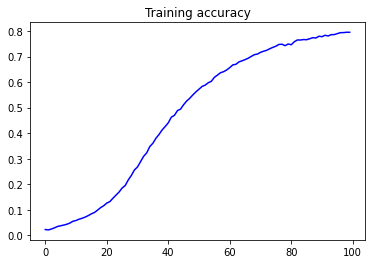

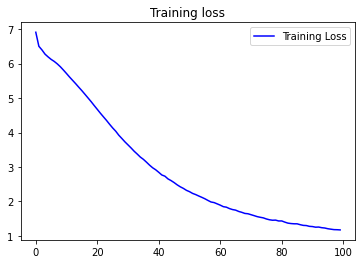

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [27]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted_x = model.predict(token_list, verbose = 0)
  predicted = np.argmax(predicted_x,axis=1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope thee is the sun esteem wit ' so bright so long bright spent kindness cross cross wit thee so great worth thee love not so deem'd so green my eye alone in thine eyes so made for me best so due to thee grace so blind change thy old might sit date shade thee ' so ' find of heaven's rhyme wife new rage new after new cheeks wide rhyme of mine own praise out bright alone bright prove thee bright worth no poor name ever so worth thee so bright poor age did boast thee so not love me
